## ИУ5-22М Киричков Евсей РК1

### Вариант: 8

Номер задачи №1: 8

Номер задачи №2: 28

Дополнительные требования: для произвольной колонки данных построить гистограмму.

### Задача №8.

Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения модой.

#### Описание набора данных
Набор данных Индекса гендерного неравенства (ИГН) обеспечивает комплексную оценку гендерного неравенства в разных странах, отражая гендерные различия в сфере здравоохранения, образования и экономических возможностей.
Разработанный Программой развития Организации Объединенных Наций (ПРООН), индекс GII измеряет гендерное неравенство путем анализа показателей здоровья, расширения прав и возможностей и участия на рынке труда.

Этот набор данных включает баллы ГИИ, а также баллы по компонентам для каждого индикатора по более чем 190 странам в 2021 году.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.impute import SimpleImputer
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data_loaded = pd.read_csv('data/Gender_Inequality_Index.csv', sep=",")

In [3]:
data = data_loaded

In [4]:
list(zip(data.columns, [i for i in data.dtypes]))

[('Country', dtype('O')),
 ('Human_development', dtype('O')),
 ('GII', dtype('float64')),
 ('Rank', dtype('float64')),
 ('Maternal_mortality', dtype('float64')),
 ('Adolescent_birth_rate', dtype('float64')),
 ('Seats_parliament', dtype('float64')),
 ('F_secondary_educ', dtype('float64')),
 ('M_secondary_educ', dtype('float64')),
 ('F_Labour_force', dtype('float64')),
 ('M_Labour_force', dtype('float64'))]

In [5]:
cols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
cols_with_na

['Human_development',
 'GII',
 'Rank',
 'Maternal_mortality',
 'Seats_parliament',
 'F_secondary_educ',
 'M_secondary_educ',
 'F_Labour_force',
 'M_Labour_force']

In [6]:
data_loaded.shape

(195, 11)

In [7]:
# Количество пропусков
[(c, data[c].isnull().sum()) for c in cols_with_na]

[('Human_development', 4),
 ('GII', 25),
 ('Rank', 25),
 ('Maternal_mortality', 11),
 ('Seats_parliament', 2),
 ('F_secondary_educ', 18),
 ('M_secondary_educ', 18),
 ('F_Labour_force', 15),
 ('M_Labour_force', 15)]

In [8]:
# Процент пропусков
[(c, (data[c].isnull().mean()) * 100) for c in cols_with_na]

[('Human_development', 2.051282051282051),
 ('GII', 12.82051282051282),
 ('Rank', 12.82051282051282),
 ('Maternal_mortality', 5.641025641025641),
 ('Seats_parliament', 1.0256410256410255),
 ('F_secondary_educ', 9.230769230769232),
 ('M_secondary_educ', 9.230769230769232),
 ('F_Labour_force', 7.6923076923076925),
 ('M_Labour_force', 7.6923076923076925)]

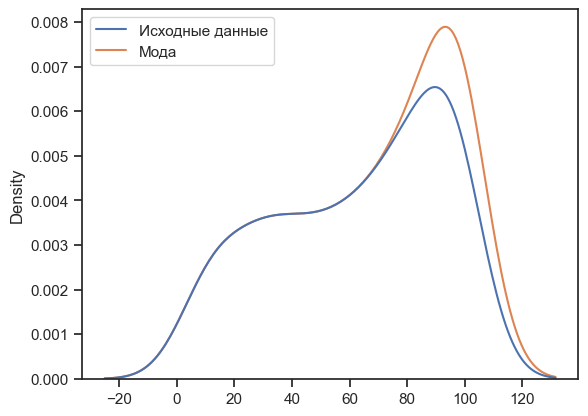

In [9]:
# Построение графика разницы между исходными данными признака и данными признака с модой вместо пропусков.
temp_data = data[['F_secondary_educ']].values
size = temp_data.shape[0]
new_df = pd.DataFrame({'Исходные данные':temp_data.reshape((size,))})
imputer = SimpleImputer(strategy='most_frequent')
temp_data_filled = imputer.fit_transform(temp_data)
new_df['Мода'] = temp_data_filled.reshape((size,))
sns.kdeplot(data=new_df)

# Замена данных указанного признака на данные с модой вместо пропусков.
data['F_secondary_educ'] = data['F_secondary_educ'].replace(new_df['Мода'])

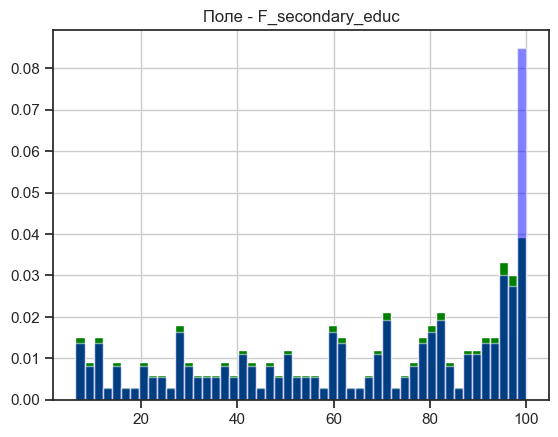

In [10]:
# Гистограмма
# Разница между распределениями до и после заполнения пропусков модой
fig = plt.figure()
ax = fig.add_subplot(111)
ax.title.set_text('Поле - F_secondary_educ')
new_df['Исходные данные'].hist(bins=50, ax=ax, density=True, color='green')
new_df['Мода'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
plt.show()

### Задача №28.

Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе межквартильного размаха.

#### Описание набора данных
Набор данных содержит 3276 записей о водоемах, 9 столбцов характеристик, включая «ph», «жесткость», «твердые вещества», «хлорамины», «сульфат», «проводимость», «органический углерод», «тригалометаны» и «мутность». ', и один двоичный столбец под названием «Питьевая возможность», где 1 означает, что вода пригодна для питья (т. е. безопасна для употребления), а 0 означает, что вода не пригодна для питья (т. е. небезопасна для употребления).

In [11]:
data_loaded_2 = pd.read_csv('data/water_potability.csv', sep=",")

In [12]:
data_2 = data_loaded_2

In [13]:
list(zip(data_2.columns, [i for i in data_2.dtypes]))

[('ph', dtype('float64')),
 ('Hardness', dtype('float64')),
 ('Solids', dtype('float64')),
 ('Chloramines', dtype('float64')),
 ('Sulfate', dtype('float64')),
 ('Conductivity', dtype('float64')),
 ('Organic_carbon', dtype('float64')),
 ('Trihalomethanes', dtype('float64')),
 ('Turbidity', dtype('float64')),
 ('Potability', dtype('int64'))]

In [14]:
def diagnostic_plots(df, variable, title):
    fig, axs = plt.subplots(2, 2, figsize=(10, 7))
    # гистограмма
    axs[0, 0].hist(df[variable], bins=30)
    axs[0, 0].set_title('Histogram')
    # Q-Q plot
    stats.probplot(df[variable], dist="norm", plot=axs[0, 1])
    axs[0, 1].set_title('Q-Q Plot')
    # скрипичный
    sns.violinplot(x=df[variable], ax=axs[1, 0])
    axs[1, 0].set_title('Violin Plot')
    # ящик с усами
    sns.boxplot(x=df[variable], ax=axs[1, 1])
    axs[1, 1].set_title('Box Plot')
    # Настройка общего заголовка
    fig.suptitle(title)
    # Показать график
    plt.show()

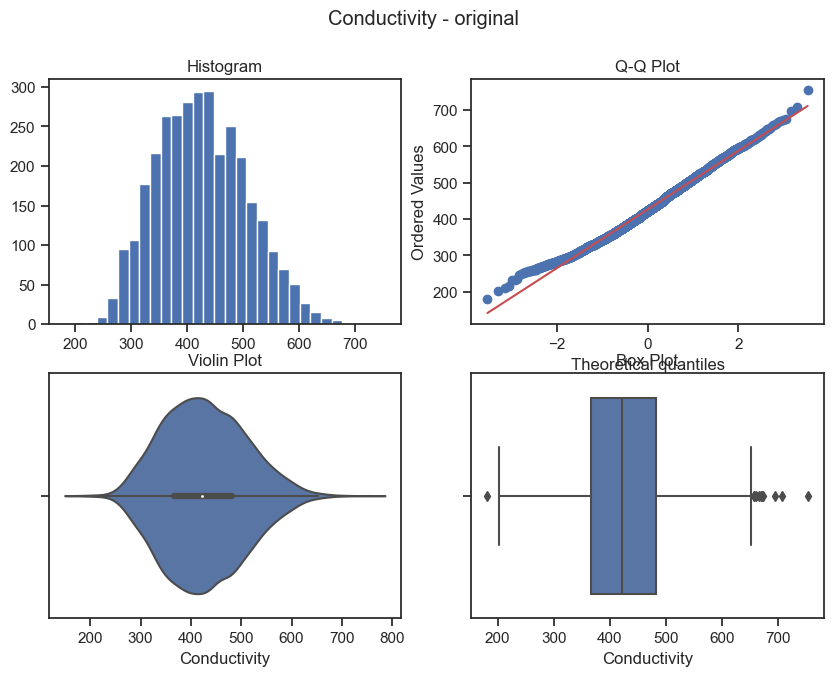

In [15]:
diagnostic_plots(data_2, 'Conductivity', 'Conductivity - original')

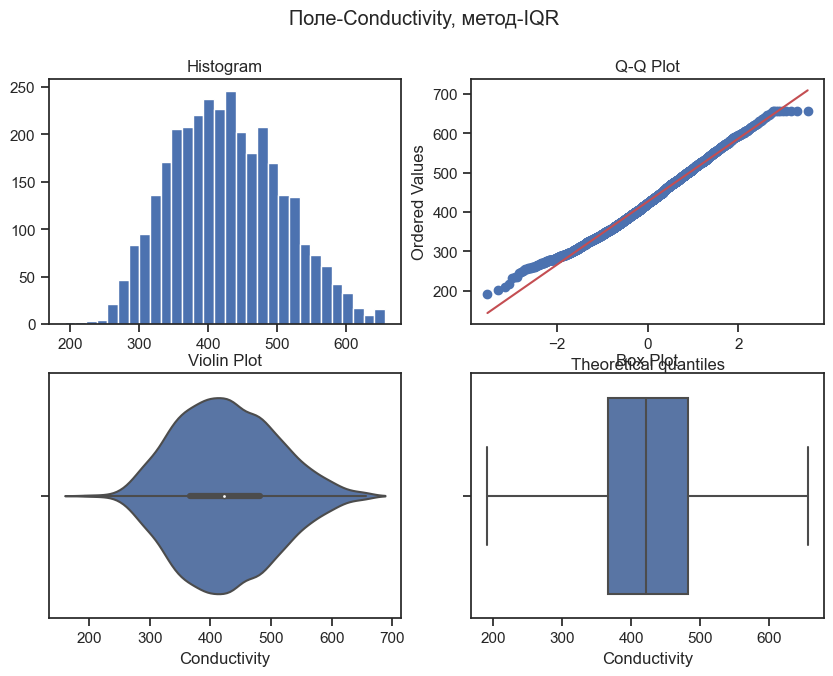

In [16]:
def detect_replace_outliers_iqr(df, column_name):
    K = 1.5
    IQR = df[column_name].quantile(0.75) - df[column_name].quantile(0.25)
    lower_boundary = df[column_name].quantile(0.25) - (K * IQR)
    upper_boundary = df[column_name].quantile(0.75) + (K * IQR)
    df[column_name] = np.where(df[column_name] > upper_boundary, upper_boundary, 
                            np.where(df[column_name] < lower_boundary, lower_boundary, df[column_name]))
    title = 'Поле-{}, метод-{}'.format(column_name, 'IQR')
    diagnostic_plots(df, column_name, title)
detect_replace_outliers_iqr(data_2, 'Conductivity')